In [1]:
import kaggle

In [2]:
import pandas as pd 
import numpy as np

In [3]:
kaggle.api.authenticate()

In [4]:
kaggle.api.dataset_download_files('uciml/sms-spam-collection-dataset',path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


In [5]:
df = pd.read_csv('spam.csv' , encoding="latin1")

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2953,ham,Think i might have to give it a miss. Am teach...,NaN,NaN,NaN
2804,ham,I think it's all still in my car,NaN,NaN,NaN
2603,ham,\Im at arestaurant eating squid! i will be out...,NaN,NaN,NaN
2163,ham,hi my darlin im on my way to London and we hav...,NaN,NaN,NaN
5078,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
'''data cleaning '''

'data cleaning '

In [9]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [10]:
print(df.head)

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

In [11]:
print(df.columns.tolist())

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [12]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
#renaming colomns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
459,ham,Going thru a very different feeling.wavering d...
2379,ham,"Good evening Sir, hope you are having a nice d..."
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...
2966,ham,NEFT Transaction with reference number &lt;#&...
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."


In [14]:
#pip install scikit-learn

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.sample(5)

,target,text
2084,0,How are you. Wish you a great semester
5350,0,No one interested. May be some business plan.
5248,0,U come n search tat vid..not finishd..
2035,0,Simply sitting and watching match in office..
2836,0,1's reach home call me.


In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [21]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(5169, 2)

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts() #count the no of values per coloumn

target
0    4516
1     653
Name: count, dtype: int64

In [26]:
#pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2c1237492b0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.3670'),
  Text(0.553363565906573, -0.231924047755212, '12.6330')])

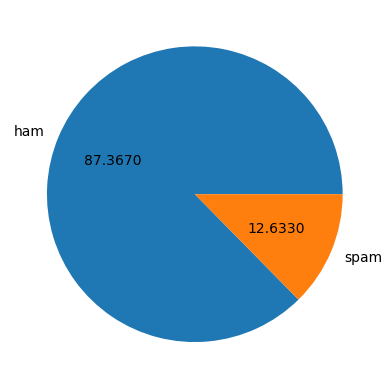

In [28]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.4f')

In [29]:
#pip install nltk

In [30]:
import nltk
#nltk.download('punkt')

In [31]:
#df['num_characters'] = df['text'].apply(len)
#df.loc[:, 'num_characters'] =df['text'].apply(len)
df = df.copy()
df['num_characters'] = df['text'].apply(len) #This is the cleanest fix: you tell Pandas “make a real copy, don’t just point to the original”.

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#nltk.download('punkt_tab')

In [34]:
from nltk.tokenize import word_tokenize

In [35]:
#df = pd.DataFrame({'text': ["Hello there", "Free offer !!!", "Good morning"]}) 
#df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) 
#print(df)

In [36]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

In [37]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df.loc[:,'num_characters'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [40]:
df.loc[:,'num_characters'] = df['text'].apply(len)

In [41]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df.loc[:, 'num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe().round(2)

,num_characters,num_words,num_sentences
count,4516.00,4516.00,4516.00
mean,70.46,17.12,1.82
std,56.36,13.49,1.38
min,2.00,1.00,1.00
25%,34.00,8.00,1.00
50%,52.00,13.00,1.00
75%,90.00,22.00,2.00
max,910.00,220.00,38.00


In [45]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe().round(2)

,num_characters,num_words,num_sentences
count,653.00,653.00,653.00
mean,137.89,27.67,2.97
std,30.14,7.01,1.49
min,13.00,2.00,1.00
25%,132.00,25.00,2.00
50%,149.00,29.00,3.00
75%,157.00,32.00,4.00
max,224.00,46.00,9.00


In [46]:
#pip install seaborn
import seaborn as sns

In [47]:
#this can be plotted using both matplotlib and seaborn im trying to share both implementation

In [48]:
#pip install matplotlib

In [49]:
import matplotlib.pyplot as plt

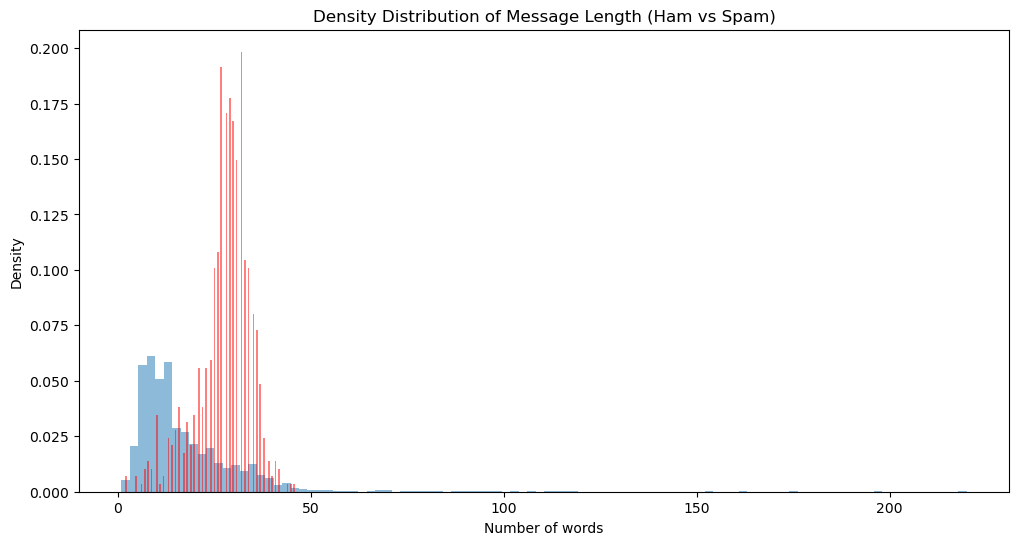

In [50]:
plt.figure(figsize=(12,6))
#ham
plt.hist(df[df['target'] == 0]['num_words'], 
         bins=100, density=True, alpha=0.5, label='Ham')
# Spam messages
plt.hist(df[df['target'] == 1]['num_words'], 
         bins=100, density=True, alpha=0.5, color='red', label='Spam')
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.title("Density Distribution of Message Length (Ham vs Spam)")
#plt.legend() #When you call plt.legend(), Matplotlib looks for all the plotted elements (like histograms, lines, bars, etc.) that have a label and shows them in a legend box.
plt.show()

<Axes: xlabel='num_words', ylabel='Count'>

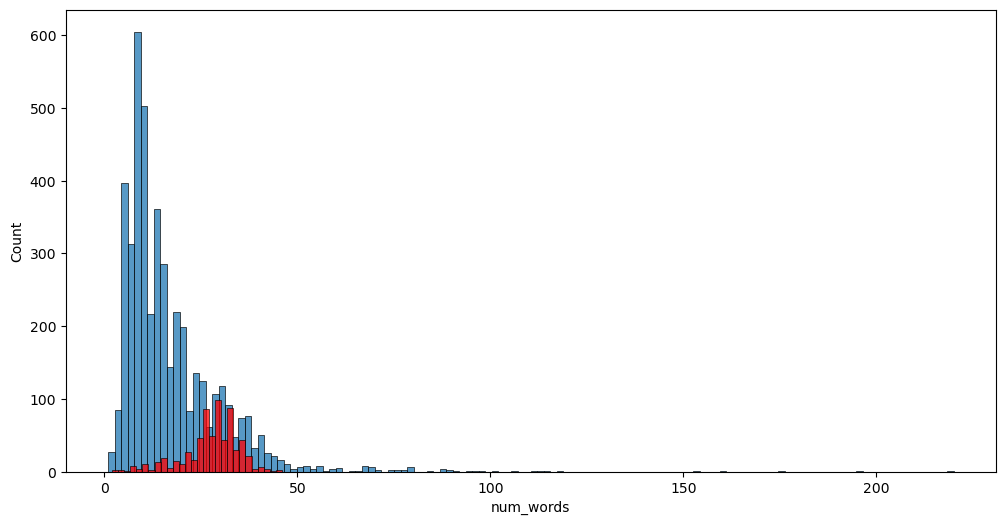

In [51]:
#implementation with seaborn
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

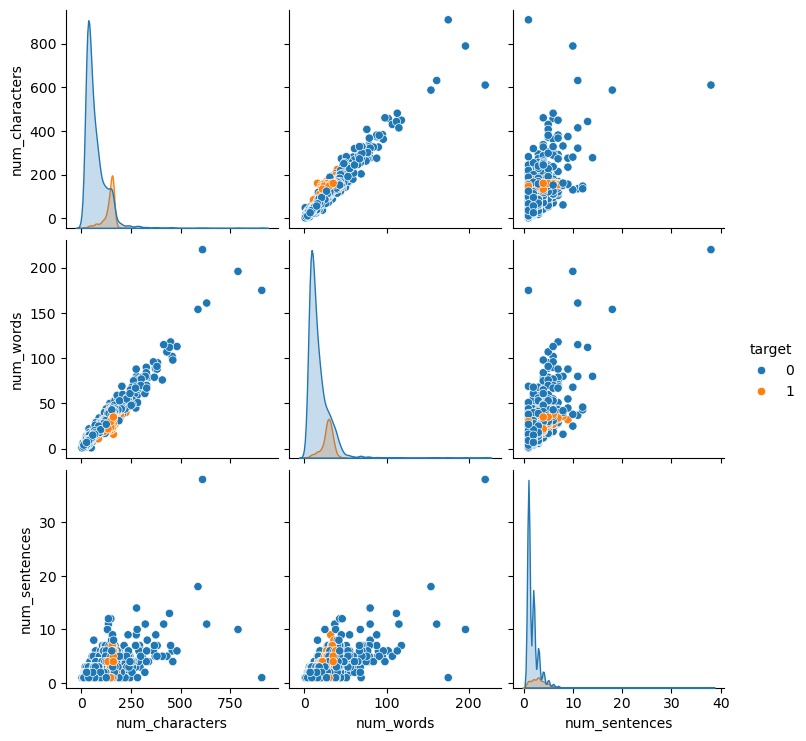

In [52]:
sns.pairplot(df,hue='target')

<Axes: >

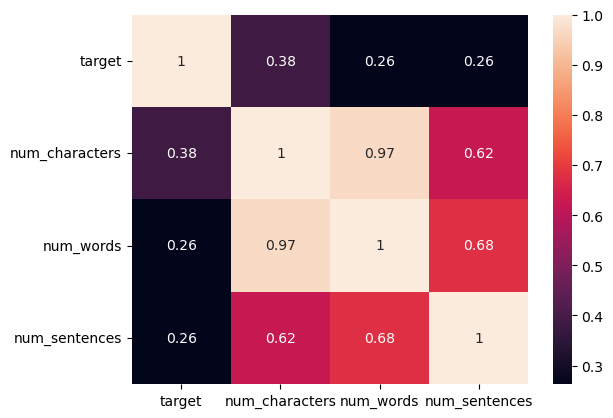

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [54]:
# Data Preprocessing: Lower case → Tokenization → Remove special characters → Remove stop words & punctuation → Stemming

In [55]:
def transform_text(text):   #def keyword ,transform_text name of the function, text parameter of the function
    text = text.lower()     #converts the entire string into lowercase
    text = nltk.word_tokenize(text) #split the text into individual tokens

    y=[]                    # temporary storage list
    for i in text:          # Loop through each token (word or symbol) in the list 'text'
        if i.isalnum():      # Check if the token is alphanumeric (only letters or digits, no punctuation or special chars)
            y.append(i)     # If yes, add it to the list 'y'
    
    text = y[:]             # Copies filtered tokens back to text.
    y.clear()               # clears y so it can be reused 

    for i in text:
        #stopwords.words('english') → gives you a list of very common English words (like is, the, a, an, in, on, and …).
        #This condition checks if the word i is not in the stopwords list.
        #string.punctuation contains all punctuation characters like ['!', '?', ',', '.', ';', ':', '-', '...'].This condition ensures we skip punctuation marks.
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i)) #Uses Porter Stemmer (ps.stem) to reduce words to their root form.Example: "playing" → "play", "running" → "run"
    
    return " ".join(y)
    

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

In [58]:
sample = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet..."
print(transform_text(sample))
#After removing non-alphanumeric: ['Go', 'until', 'jurong', 'point', 'crazy', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet']
#After removing stopwords & punctuation: ['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'great', 'world', 'buffet']
#After stemming: ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'great', 'world', 'buffet']


go jurong point crazi avail bugi n great world la e buffet


In [59]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [60]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [61]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer() 
ps.stem('loving') # reducing the word to its root/base from might not sound same as dictionary
ps.stem('crying')

'cri'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [63]:
df.to_csv("transformed_spam.csv", index=False)

In [64]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
#pip install wordcloud

In [66]:
from wordcloud import WordCloud

In [67]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [68]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

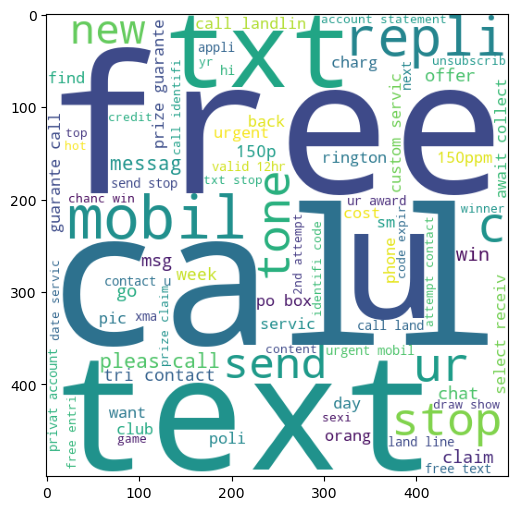

In [69]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [70]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

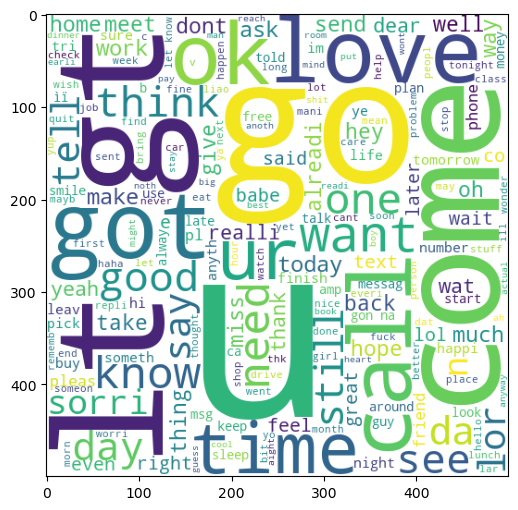

In [71]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [74]:
len(spam_corpus)

9939

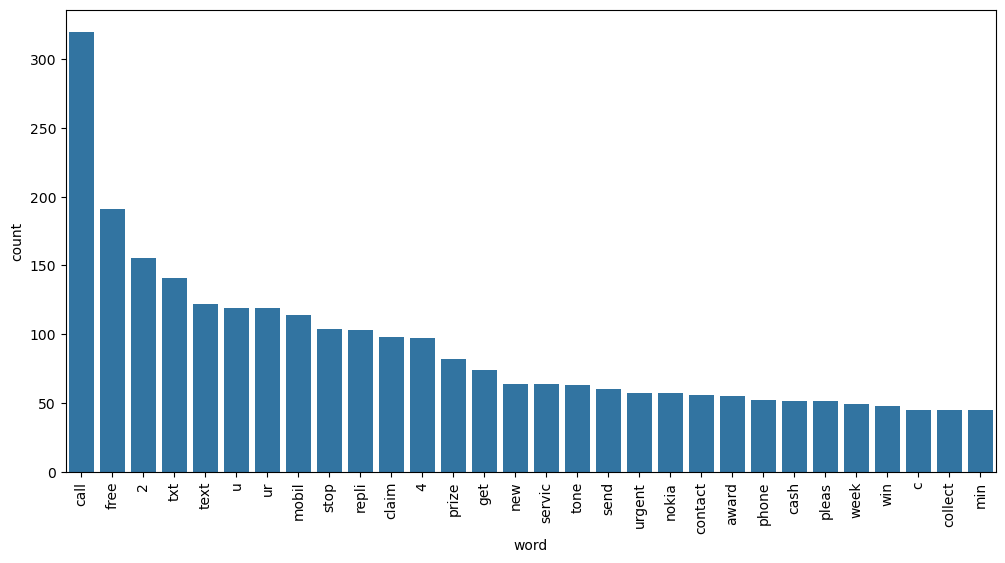

In [75]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word','count'])
'''sns.barplot(
    pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)'''
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data= word_counts)
plt.xticks(rotation = 90)
plt.show()

In [76]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [77]:
len(ham_corpus)

35404

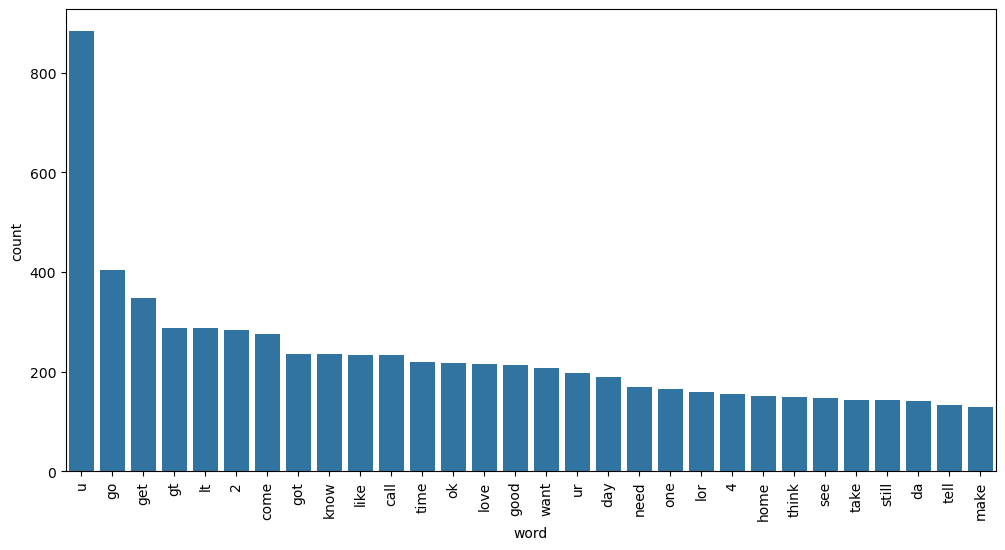

In [78]:
from collections import Counter
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data= word_counts, hue=10, palette="tab20", legend=False )
plt.xticks(rotation = 90)
plt.show()

In [79]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [80]:
#Model Building

In [81]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [82]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [83]:
X.shape

(5169, 3000)

In [84]:
y=df['target'].values

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [87]:
#training with svm approach

In [88]:
#traning this GuassianNB approach
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [89]:
#traning using svm approach
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')  # linear works best for text
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_svm))
print("precision Score", precision_score(y_test,y_pred_svm))

Accuracy: 0.9787234042553191
Confusion Matrix :
 [[893   3]
 [ 19 119]]
precision Score 0.9754098360655737


In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [91]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [92]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [93]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [94]:
# tfidf --> MNB

In [95]:
#unattended
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [98]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [99]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [100]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487


In [101]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [102]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.933269,0.841584


In [103]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [104]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.933269


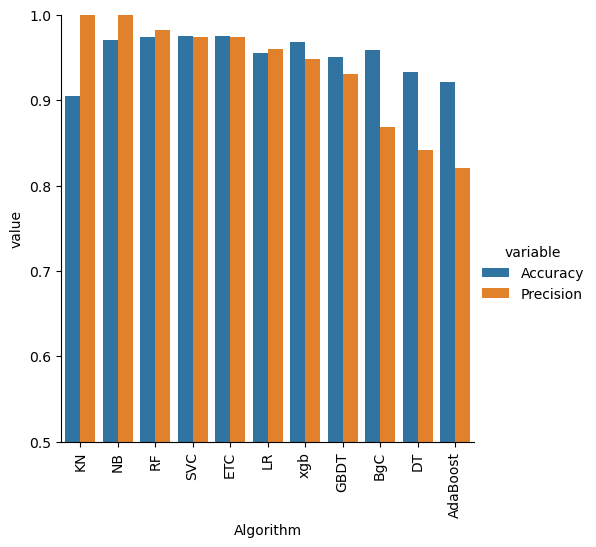

In [105]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [108]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [109]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [110]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [112]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584,0.933269,0.841584


In [ ]:
#voting classifier the create a combination of best perfoming models

In [113]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [115]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [116]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [117]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [118]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [119]:
from sklearn.ensemble import StackingClassifier

In [120]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [121]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [122]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))